In [1]:
!pip3 install beautifulsoup4
!pip3 install requests

### IMPORT LIBRARIES

In [2]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

## Download the 245 url in a list

In [3]:
jobpaw_url=[]
for PagenumRS in range(0,245):
    index="https://www.jobpaw.com/pont/professionnels.php?pageNum_RS_job="+str(PagenumRS)+"&totalRows_RS_job=12233&id=55"
    jobpaw_url.append(index)
jobpaw_url[0]

'https://www.jobpaw.com/pont/professionnels.php?pageNum_RS_job=0&totalRows_RS_job=12233&id=55'

## WEB SCRAPE OF THE FIRST PAGE

In [4]:
response=requests.get(jobpaw_url[0]).text
soup=BeautifulSoup(response,"html.parser")

In [5]:
#get the number of table on a page 
gdp=soup.find_all("table",attrs={"class":"table table-hover table-bordered"})
print("number of tables on site :",len(gdp))    

number of tables on site : 1


In [6]:
# Extract the head of the table found
table=gdp[0]
body=table.find_all("tr")
head=body[0]
body_rows=body[1:]
headings=[]
for item in head.find_all("th"):
    item=(item.text).rstrip("\n")
    headings.append(item)
print(headings)

['Institution', 'Titre du poste', 'Domaine', 'Date limite']


In [7]:
# Extract the rows in the table
all_rows=[]
for row_num in range(len(body_rows)):
    row=[]
    for row_item in body_rows[row_num].find_all("td"):
        aa=re.sub("(\xa0)|(\t)|,","",row_item.text)#subtract \t in the rows found
        row.append(aa)
    all_rows.append(row)

In [8]:
# Place the rows in a dataFrame with the header
df=pd.DataFrame(data=all_rows,columns=headings)
#drop the last two rows
df.drop(df.tail(2).index,inplace=True)

In [9]:
df.head()

,Institution,Titre du poste,Domaine,Date limite
0,Haiti Business Center_ Henry & Wallace,Customer Service Agent with English,Management/Gestion Finance Comptabilité et Com...,29 Mars 22
1,Save the Children en Haiti,Officier(ère) en Communication,Communication et Journalisme,28 Mars 22
2,Save the Children en Haiti,Assistant(e) à l’Education de Base,Sciences de l’Education,28 Mars 22
3,Mercy Corps Haiti,Subaward Officer,Management/Gestion Finance Comptabilité et Com...,25 Mars 22
4,CARE Haiti,Gestionnaire Financier,Management/Gestion Finance Comptabilité et Com...,25 Mars 22


In [17]:
#df1 = df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
#df1.set_properties(**{'text-align': 'center'})

## WEB SCRAPE OF THE OTHER PAGES

In [10]:
df1=[] # A list that receives all_rows after iteration
for url in range(1,245):
    response=requests.get(jobpaw_url[url]).text
    soup=BeautifulSoup(response,"html.parser")
    gdp=soup.find_all("table",attrs={"class":"table table-hover table-bordered"})
    #print("number of tables on site :",len(gdp))
    table=gdp[0]
    body=table.find_all("tr")
    head=body[0]
    body_rows=body[1:]
# A for loop which extract the rows and put them in the all_rows list below
    all_rows=[]
    for row_num in range(len(body_rows)):
        row=[]
        for row_item in body_rows[row_num].find_all("td"):
            aa=re.sub("(\xa0)|(\t)|,","",row_item.text)
            row.append(aa)
        all_rows.append(row)
    df1.append(pd.DataFrame(data=all_rows,columns=headings))
    df3=df.append(df1)

In [143]:
df3.head()

,Institution,Titre du poste,Domaine,Date limite
0,Haiti Business Center_ Henry & Wallace,Customer Service Agent with English,Management/Gestion Finance Comptabilité et Com...,29 Mars 22
1,Save the Children en Haiti,Officier(ère) en Communication,Communication et Journalisme,28 Mars 22
2,Save the Children en Haiti,Assistant(e) à l’Education de Base,Sciences de l’Education,28 Mars 22
3,Mercy Corps Haiti,Subaward Officer,Management/Gestion Finance Comptabilité et Com...,25 Mars 22
4,CARE Haiti,Gestionnaire Financier,Management/Gestion Finance Comptabilité et Com...,25 Mars 22


## DATA CLEANING

In [144]:
# Drop the rows with null value
# They content non revelant information
df4=df3.dropna()

In [152]:
#drop the first index and replace it with a new one
df4.reset_index(drop=True)

,Institution,Titre du poste,Domaine,Date limite,Day,Month,year
0,Haiti Business Center_ Henry & Wallace,Customer Service Agent with English,Management/Gestion Finance Comptabilité et Com...,29 Mars 22,29,Mars,22
1,Save the Children en Haiti,Officier(ère) en Communication,Communication et Journalisme,28 Mars 22,28,Mars,22
2,Save the Children en Haiti,Assistant(e) à l’Education de Base,Sciences de l’Education,28 Mars 22,28,Mars,22
3,Mercy Corps Haiti,Subaward Officer,Management/Gestion Finance Comptabilité et Com...,25 Mars 22,25,Mars,22
4,CARE Haiti,Gestionnaire Financier,Management/Gestion Finance Comptabilité et Com...,25 Mars 22,25,Mars,22
...,...,...,...,...,...,...,...
11985,Secteur international,Generator Operator,Sciences de l’Ingénieur,00 00,,00,00
11986,KonbitSante:Cap Haitien Health Partnership,Program Manager,Santé et Professions médicales,00 00,,00,00
11987,Habitat for Humanity International,Logistik ak materyel kodonate (konsiltan) / Lo...,Transport et Logistique,00 00,,00,00
11988,JobPaw,Construction Foreman/Superintendent,Métiers du bâtiment et autres,00 00,,00,00


In [34]:
#df4.to_csv()

In [148]:
df4[['Day','Month','year']]=df4['Date limite'].str.split(' ',expand=True)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## EDA

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [124]:
df_Institution=pd.DataFrame(df4['Institution'].value_counts())

In [155]:
df_Institution.head(50)

,Institution
CRS,741
Plan International-Haiti,372
Save the Children en Haiti,314
Secteur prive,296
Secteur ong,287
Concern Worldwide Haiti,286
CARE Haiti,266
GOAL Haiti,214
OHMaSS (PSI-Haïti),198
Croix Rouge Americaine,193


Text(0.5, 1.0, 'Top 10 recruiting institution')

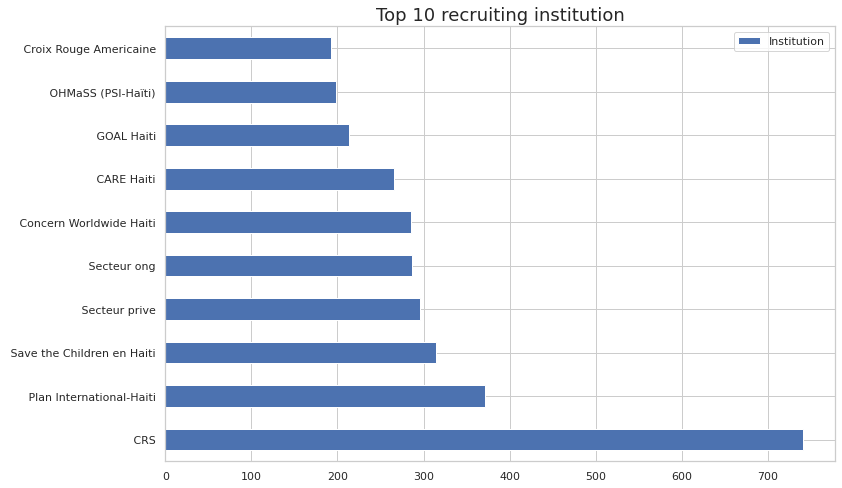

In [131]:
df_Institution.head(10).plot.barh(figsize=(12,8))
plt.title('Top 10 recruiting institution',fontsize=18)

In [157]:
df_titre=pd.DataFrame(df4['Titre du poste'].value_counts())

In [158]:
df_titre.head(15)

,Titre du poste
Comptable,94
Chauffeur,71
Assistante Administrative,41
Administrative Assistant,37
Finance Manager,35
Procurement Officer,24
Program Manager,23
Travailleur Social,23
Project Manager,22
Logisticien,21


Text(0.5, 1.0, 'Top 10 title job posted by number')

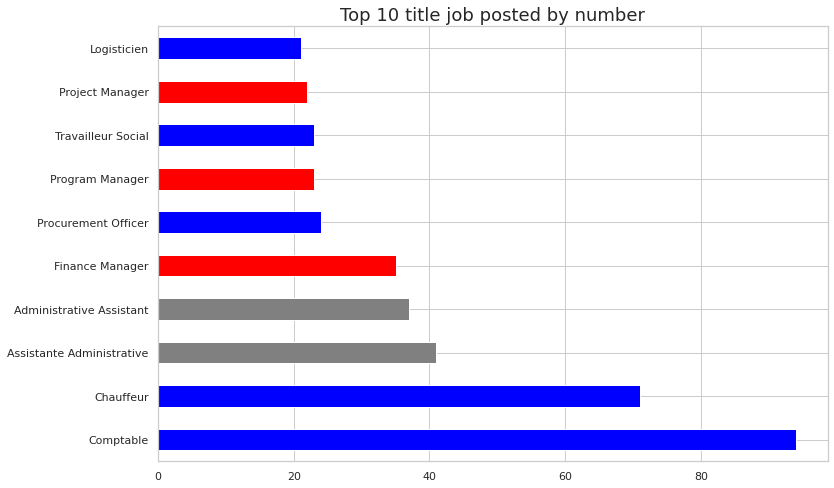

In [137]:
df_titre.head(10).plot.barh(figsize=(12,8),color=['blue','blue','grey','grey','red','blue','red','blue','red','blue'])
plt.title('Top 10 title job posted by number',fontsize=18)

In [159]:
#df5=df4['Domaine'].value_counts()
df_domaine=df4['Domaine'].value_counts()
df_domaine.head(15)

Management/Gestion Finance Comptabilité et Commerce    4035
Santé et Professions médicales                         1420
Sciences Humaines et Sociales                          1320
Agriculture – Agroalimentaire                           820
Sciences de l’Ingénieur                                 662
Sciences économiques et politiques                      476
Sciences Informatiques                                  453
Transport et Logistique                                 409
Sciences de l’Education                                 388
Secrétariat                                             370
Communication et Journalisme                            350
Marketing                                               187
- - Non-defini - -                                      186
Environnement et Sciences de la Terre                   184
Architecture Urbanisme et Aménagement du territoire     162
Name: Domaine, dtype: int64

Text(0.5, 1.0, 'Top 10 wanted field by number of job posted ')

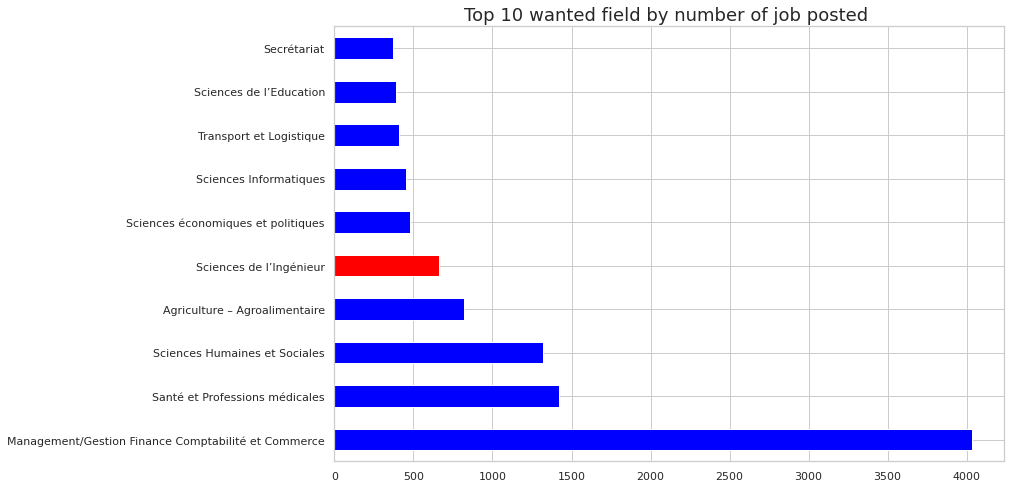

In [161]:
df_domaine.head(10).plot.barh(figsize=(12,8),color=['blue','blue','blue','blue','red','blue','blue','blue','blue','blue'])
plt.title('Top 10 wanted field by number of job posted ',fontsize=18)

Text(0.5, 1.0, 'Number of job posted by month')

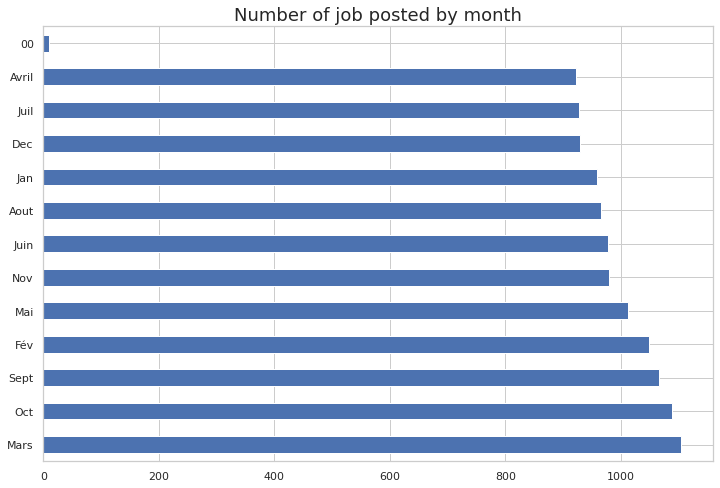

In [100]:
df4['Month'].value_counts().plot.barh(figsize=(12,8))
plt.title('Number of job posted by month',fontsize=18)

Text(0.5, 1.0, 'Number of job posted by year')

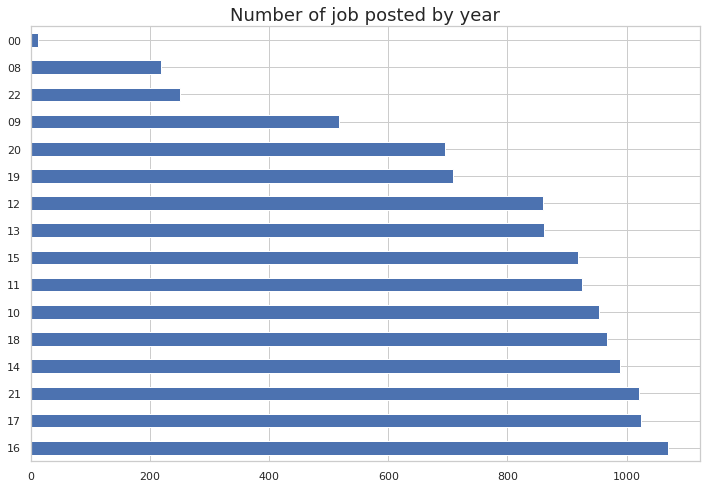

In [104]:
df4['year'].value_counts().plot.barh(figsize=(12,8))
plt.title('Number of job posted by year',fontsize=18)